In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ForIvan_v2.xlsx to ForIvan_v2.xlsx


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Prepped_PP56_Data.xlsx to Prepped_PP56_Data.xlsx


In [ ]:
import pandas as pd
import numpy as np


data = pd.read_excel("ForIvan.xlsx", sheet_name='Sheet1')
df= pd.DataFrame(data)
PP56_data= pd.read_excel("Prepped_PP56_Data.xlsx")
df3 = pd.DataFrame(PP56_data)
pp13b = pd.read_excel("ForIvan_v2.xlsx",sheet_name="Sheet1")

In [ ]:
df['Assemblage'].value_counts()

PP13B       417
Brown       375
Ember       204
Unheated    135
Sandbath    105
Direct       48
Kiln         30
Name: Assemblage, dtype: int64

In [ ]:
df1 = df.iloc[509:]
df1 = df1.drop(['Date', 'Type','StratAgg'], axis=1)
df1 = df1[df1['Assemblage'].isin(['Unheated','Sandbath','Ember','Direct'])]

In [ ]:
df2 = pp13b
df2 = df2.drop(['Date', 'Type','StratAgg'], axis=1)
df2 = df2[df2['Assemblage'] == 'PP13B']


In [ ]:
df2

In [ ]:
SC = df1
groupSC = SC.groupby(["PlottedFind","Assemblage"], as_index=False).mean()
X = groupSC.drop(['PlottedFind','Assemblage'], axis=1)
X.columns = X.columns.astype(str)
y = groupSC['Assemblage']

<ipython-input-7-cb0b60ce6255>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupSC = SC.groupby(["PlottedFind","Assemblage"], as_index=False).mean()


In [ ]:
SC2 = df2
groupSC2 = SC2.groupby(["PlottedFind","Assemblage"], as_index=False).mean()
pp13b = groupSC2.drop(['PlottedFind','Assemblage'], axis=1)
pp13b.columns = pp13b.columns.astype(str)

<ipython-input-8-69aa36f27f1b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupSC2 = SC2.groupby(["PlottedFind","Assemblage"], as_index=False).mean()


In [ ]:
SC3 = df3
groupSC3 = SC3.groupby(["PlottedFind","Assemblage"], as_index=False).mean()
pp56 = groupSC3.drop(['PlottedFind','Assemblage'], axis=1)
pp56.columns = pp56.columns.astype(str)
y2 = groupSC3["PlottedFind"]

<ipython-input-9-0be97b3200c9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupSC3 = SC3.groupby(["PlottedFind","Assemblage"], as_index=False).mean()


In [ ]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rf_model = RandomForestClassifier(n_estimators=20, random_state=42069)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=42069)

In [ ]:
y_pred1 = rf_model.predict(pp13b)

groupSC2['Assemblage'] = y_pred1

In [ ]:

groupSC2.to_excel("PP_13_B_Predictions.xlsx", index=False)


files.download("PP_13_B_Predictions.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
y_pred2 = rf_model.predict(pp56)


groupSC3['Assemblage'] = y_pred2


In [ ]:
# Assuming groupSC2 is your DataFrame
groupSC3.to_excel("PP_5-6_Predictions.xlsx", index=False)

# Now, you can use files.download to download the file
files.download("PP_5-6_Predictions.xlsx")

Ember       89
Sandbath    48
Unheated    32
Direct       9
Name: Assemblage, dtype: int64


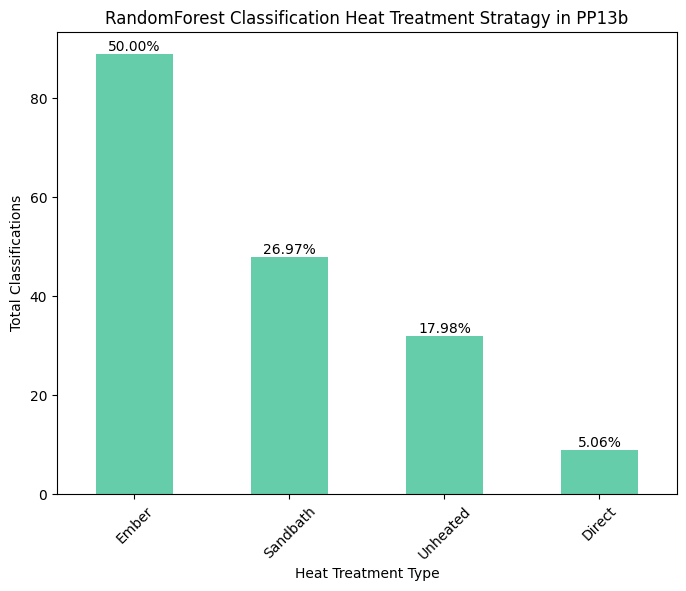

In [ ]:
import matplotlib.pyplot as plt

# Calculate value counts
label_counts = groupSC2['Assemblage'].value_counts()

# Create a bar graph
plt.figure(figsize=(8, 6))
ax = label_counts.plot(kind='bar', color='mediumaquamarine')

# Add labels and title
plt.xlabel('Heat Treatment Type')
plt.xticks(rotation=45)
plt.ylabel('Total Classifications')
plt.title('RandomForest Classification Heat Treatment Stratagy in PP13b')

#Add percentage
total_count = label_counts.sum()
for i, v in enumerate(label_counts):
    percentage = (v / total_count) * 100
    ax.text(i, v, f'{percentage:.2f}%', ha='center', va='bottom')
# Show the plot
print(label_counts)


Ember       2497
Sandbath     663
Unheated     450
Direct        53
Name: Assemblage, dtype: int64


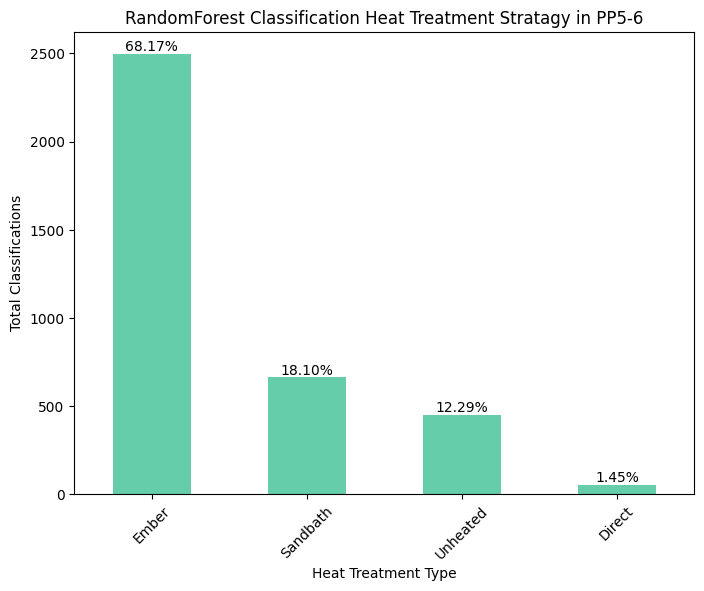

In [ ]:
import matplotlib.pyplot as plt

# Calculate value counts
label_counts = groupSC3['Assemblage'].value_counts()

# Create a bar graph
plt.figure(figsize=(8, 6))
ax = label_counts.plot(kind='bar', color='mediumaquamarine')

# Add labels and title
plt.xlabel('Heat Treatment Type')
plt.xticks(rotation=45)
plt.ylabel('Total Classifications')
plt.title('RandomForest Classification Heat Treatment Stratagy in PP5-6')

#Add percentage
total_count = label_counts.sum()
for i, v in enumerate(label_counts):
    percentage = (v / total_count) * 100
    ax.text(i, v, f'{percentage:.2f}%', ha='center', va='bottom')
# Show the plot
print(label_counts)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Accuracy:  0.9974424552429667
Precision:  0.9974663575304157
Recall:  0.9974424552429667
F1-Score:  0.9974424552429667
Confusion Matrix:
 [[ 35   0   0   1]
 [  0 158   0   0]
 [  0   0  91   0]
 [  0   0   0 106]]


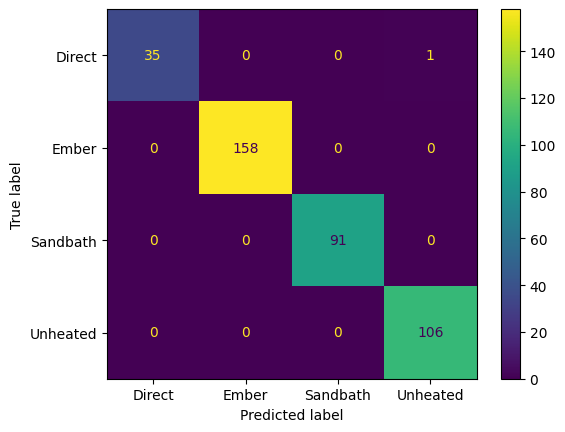

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Make predictions on the training dataset
y_pred = rf_model.predict(X_train)

# Calculate various performance metrics
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred,pos_label='positive',
                                           average='weighted')
recall = recall_score(y_train, y_pred,pos_label='positive'
                                           ,average='weighted')
f1 = f1_score(y_train, y_pred,pos_label='positive',
                                           average='micro')
conf_matrix = confusion_matrix(y_train, y_pred)



print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)
print("Confusion Matrix:\n", conf_matrix)


disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=np.unique(y_train))
disp.plot()



In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
fold = 1
auc = []
for train_idx, val_idx in skf.split(X, y):
    X_tr = X.loc[train_idx]
    y_tr = y.loc[train_idx]

    X_val = X.loc[val_idx]
    y_val = y.loc[val_idx]

    clf = RandomForestClassifier(n_estimators=26, random_state=42)
    clf.fit(X_tr, y_tr)
    pred = clf.predict(X_val)
    pred_prob = clf.predict_proba(X_val)

    # For multi-class classification, you can use accuracy_score directly
    acc_score = accuracy_score(y_val, pred)

    # For ROC AUC in multi-class, you need to use a one-vs-one or one-vs-all approach
    # Here, I'm using the one-vs-all approach for simplicity
    auc_score = roc_auc_score(y_val, pred_prob, multi_class='ovr')

    # Do something with acc_score and auc_score for each fold
    print(f"========Fold {fold} =========")
    print(f"Our accuracy on the validation set is {acc_score:0.4f} and AUC is {auc_score:0.4f}")

    fold += 1
    auc.append(auc_score)

oof_auc = np.mean(auc)
print(f'Our out of fold AUC score is {oof_auc:0.4f}')


========Fold 1 =========
Our accuracy on the validation set is 0.6939 and AUC is 0.8981
========Fold 2 =========
Our accuracy on the validation set is 0.7755 and AUC is 0.9436
========Fold 3 =========
Our accuracy on the validation set is 0.7755 and AUC is 0.9162
========Fold 4 =========
Our accuracy on the validation set is 0.7959 and AUC is 0.9384
========Fold 5 =========
Our accuracy on the validation set is 0.7959 and AUC is 0.9419
========Fold 6 =========
Our accuracy on the validation set is 0.7551 and AUC is 0.9240
========Fold 7 =========
Our accuracy on the validation set is 0.8367 and AUC is 0.9621
========Fold 8 =========
Our accuracy on the validation set is 0.7959 and AUC is 0.9384
========Fold 9 =========
Our accuracy on the validation set is 0.7143 and AUC is 0.8798
========Fold 10 =========
Our accuracy on the validation set is 0.7708 and AUC is 0.9385
Our out of fold AUC score is 0.9281


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)
fold = 1
auc = []

for train_idx, val_idx in skf.split(X, y):
    # Index for current fold samples
    X_tr = X.loc[train_idx]
    y_tr = y.loc[train_idx]

    # Index for current validation samples
    X_val = X.loc[val_idx]
    y_val = y.loc[val_idx]

    # Fit an SVM model to the current fold samples
    clf = SVC(probability=True, gamma=0.1, decision_function_shape='ovr', C=100)
    clf.fit(X_tr, y_tr)

    # Create a OneVsRestClassifier
    svm_ovr = OneVsRestClassifier(clf)
    svm_ovr.fit(X_tr, y_tr)

    pred = svm_ovr.predict(X_val)
    pred_prob = svm_ovr.predict_proba(X_val)

    # Calculate accuracy and AUC scores
    acc_score = accuracy_score(y_val, pred)
    auc_score = roc_auc_score(y_val, pred_prob, multi_class='ovr')

    auc.append(auc_score)

    print(f"========Fold {fold} =========")
    print(f"Our accuracy on the validation set is {acc_score:0.4f} and AUC is {auc_score:0.4f}")

    fold += 1

# Calculate and print the mean AUC across all folds
mean_auc = np.mean(auc)
print(f"\nMean AUC across all folds: {mean_auc:0.4f}")






========Fold 0 =========
Our accuracy on the validation set is 0.7755 and AUC is 0.9278
========Fold 1 =========
Our accuracy on the validation set is 0.7143 and AUC is 0.8633
========Fold 2 =========
Our accuracy on the validation set is 0.7755 and AUC is 0.9021
========Fold 3 =========
Our accuracy on the validation set is 0.8367 and AUC is 0.9152
========Fold 4 =========
Our accuracy on the validation set is 0.6939 and AUC is 0.8718
========Fold 5 =========
Our accuracy on the validation set is 0.6939 and AUC is 0.8781
========Fold 6 =========
Our accuracy on the validation set is 0.7143 and AUC is 0.8776
========Fold 7 =========
Our accuracy on the validation set is 0.6531 and AUC is 0.7880
========Fold 8 =========
Our accuracy on the validation set is 0.6735 and AUC is 0.7751
========Fold 9 =========
Our accuracy on the validation set is 0.5417 and AUC is 0.8492

Mean AUC across all folds: 0.8648


In [ ]:
np.mean(auc)

0.915230503826358

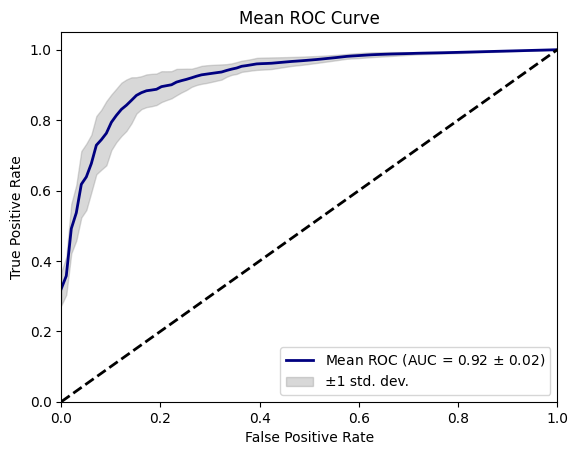

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold = 0

mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
all_auc = []

for train_idx, val_idx in skf.split(X, y):
    X_tr = X.loc[train_idx]
    y_tr = y.loc[train_idx]

    X_val = X.loc[val_idx]
    y_val = y.loc[val_idx]

    clf = RandomForestClassifier(n_estimators=30, random_state=42069)
    clf.fit(X_tr, y_tr)
    pred_prob = clf.predict_proba(X_val)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(clf.classes_)):
        fpr[i], tpr[i], _ = roc_curve((y_val == clf.classes_[i]).astype(int), pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Interpolate the average tpr at the mean_fpr
    interp_tpr = np.zeros_like(mean_fpr)
    for i in range(len(clf.classes_)):
        interp_tpr += np.interp(mean_fpr, fpr[i], tpr[i])

    interp_tpr /= len(clf.classes_)
    all_tpr.append(interp_tpr)
    all_auc.append(np.mean(list(roc_auc.values())))

    fold += 1

# Calculate the mean and standard deviation of the averaged tpr
mean_tpr = np.mean(all_tpr, axis=0)
std_tpr = np.std(all_tpr, axis=0)

# Plot the averaged ROC curve
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='navy', label=f'Mean ROC (AUC = {np.mean(all_auc):.2f} $\pm$ {np.std(all_auc):.2f})', lw=2)
plt.fill_between(mean_fpr, mean_tpr - std_tpr, mean_tpr + std_tpr, color='grey', alpha=0.3, label='±1 std. dev.')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold = 0

mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
all_auc = []

for train_idx, val_idx in skf.split(X, y):
    X_tr = X.loc[train_idx]
    y_tr = y.loc[train_idx]

    X_val = X.loc[val_idx]
    y_val = y.loc[val_idx]

    clf = RandomForestClassifier(n_estimators=16)
    clf.fit(X_tr, y_tr)
    pred_prob = clf.predict_proba(X_val)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(clf.classes_)):
        fpr[i], tpr[i], _ = roc_curve((y_val == clf.classes_[i]).astype(int), pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot individual class ROC curves
        plt.figure()
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {clf.classes_[i]} (AUC = {roc_auc[i]:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - Fold {fold} - Class {clf.classes_[i]}')
        plt.legend(loc="lower right")
        plt.show()

    # Interpolate the average tpr at the mean_fpr
    interp_tpr = np.zeros_like(mean_fpr)
    for i in range(len(clf.classes_)):
        interp_tpr += np.interp(mean_fpr, fpr[i], tpr[i])

    interp_tpr /= len(clf.classes_)
    all_tpr.append(interp_tpr)
    all_auc.append(np.mean(list(roc_auc.values())))

    fold += 1

# Calculate the mean and standard deviation of the averaged tpr
mean_tpr = np.mean(all_tpr, axis=0)
std_tpr = np.std(all_tpr, axis=0)

# Plot the averaged ROC curve
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {np.mean(all_auc):.2f} $\pm$ {np.std(all_auc):.2f})', lw=2)
plt.fill_between(mean_fpr, mean_tpr - std_tpr, mean_tpr + std_tpr, color='grey', alpha=0.3, label='±1 std. dev.')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean ROC Curve')
plt.legend(loc="lower right")
plt.show()


{0: 'Direct', 1: 'Ember', 2: 'Sandbath', 3: 'Unheated'}


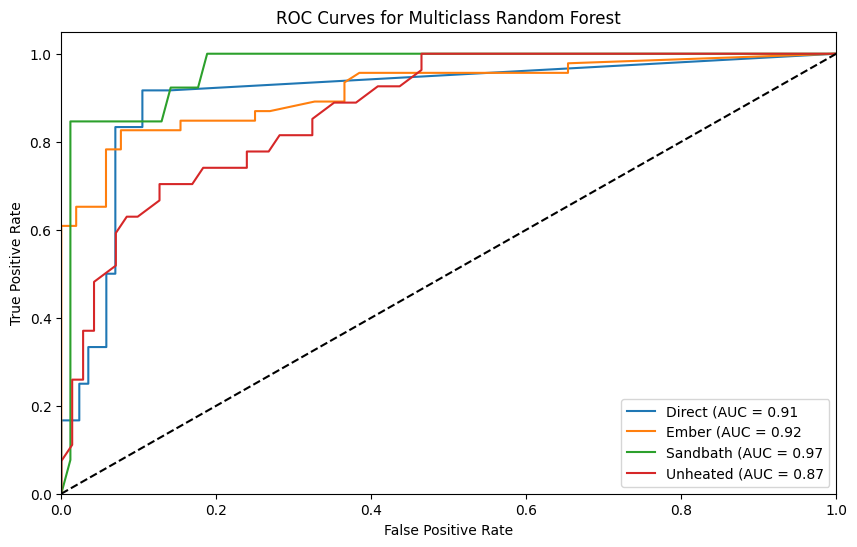

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split

# Train your multiclass classifier (e.g., Random Forest)
rf_model = RandomForestClassifier(n_estimators=16, random_state=42)  # You can adjust hyperparameters as needed
rf_model.fit(X_train, y_train)

# Binarize the labels for multiclass ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Create a OneVsRestClassifier
rf_ovr = OneVsRestClassifier(rf_model)
rf_ovr.fit(X_train, y_train)

# Get predicted probabilities for each class
y_scores = rf_ovr.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y_train))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Get unique class labels from y_train
unique_classes = np.unique(y_train)

# Create class_names dictionary based on the order of unique classes
class_names = {i: class_name for i, class_name in enumerate(unique_classes)}

# Print the class_names dictionary for verification
print(class_names)

# Plot the ROC curves
plt.figure(figsize=(10, 6))
for i in range(len(np.unique(y_train))):
    plt.plot(fpr[i], tpr[i], label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass Random Forest')
plt.legend(loc="lower right")
plt.show()

